<a href="https://colab.research.google.com/github/lnsayer/udemy_ml_course/blob/main/my_04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.1+cu121


'cpu'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

Underfitting is a scenario in data science where a data model is unable to capture the relationship between the input and output variables accurately, generating a high error rate on both the training and test set. Underfitting occurs when a model has a high bias error.

Methods for preventing overfitting:
- Increase the duration of training. This allows the model to update the weights more times and better capture the relationship.
- Add more features, e.g more hidden layers, more neurons in hidden layers or more trees in a random forest. This increases the complexity of the network and allows it to better capture the relationship.
- Decrease regularisation. By decreasing regularisation more complexity and variation is added to the model.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# Import necessary modules
# Path is a class which makes working with paths more flexible
from pathlib import Path
# A standard module to work with zip files. ZipFile actually reads the file and extractall method extracts all the member files to a destination path
import zipfile
# The requests module allows you to send HTTP requests
import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
  print(f"{image_path} exists")

else:
  # Create image path to load data into
  print(f"{image_path} does not exist, creating one")
  image_path.mkdir(parents=True, exist_ok=True)

  # download http request content into a zip file
  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    print("Downloading pizza, steak, sushi")
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

  # Unzip the zip file's data into the image_path
  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip") as zip_ref:
    print('Unzipping pizza, steak, sushi data')
    zip_ref.extractall(image_path)


data/pizza_steak_sushi does not exist, creating one
Unzipping pizza, steak, sushi data


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [5]:
# Setup train and testing paths
train_path = image_path / "train"
test_path = image_path / "test"

Image class is sushi
Image size is (512, 512)


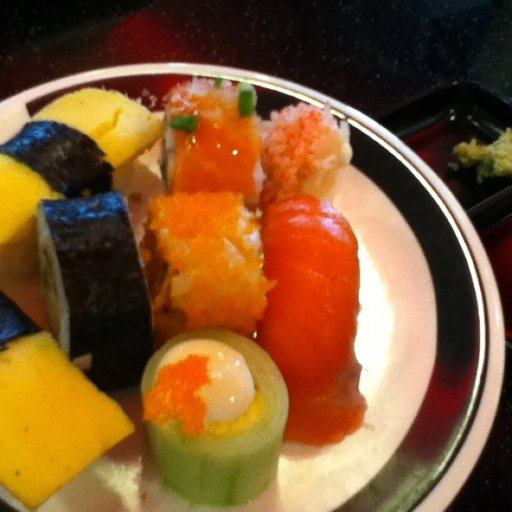

In [6]:
# Visualize an image
import random
from PIL import Image

# set the random seed
random.seed(6)

# Find all the images and sort them into a list
image_list_paths = sorted(image_path.glob("*/*/*.jpg"))
# Randomly pick an image from the list
single_image = random.choice(image_list_paths)

# print the class
image_class = single_image.parent.stem
print(f"Image class is {image_class}")

# Open image
img = Image.open(single_image)

# print image attributes
print(f"Image size is {img.size}")

img

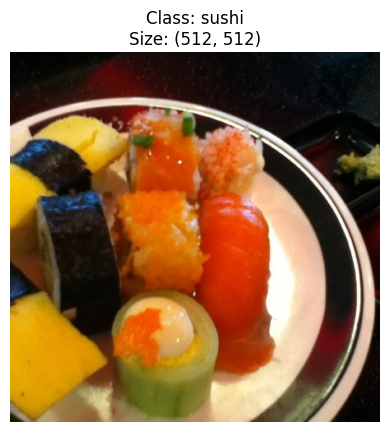

In [7]:
# Do the image visualization with matplotlib

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.imshow(img_as_array)
# Hide the axes
plt.axis(False);
# Plot a title
plt.title(f"Class: {image_class}\nSize: {img.size}");

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [8]:
# 3.1 Transforming data with torchvision.transforms

In [9]:
# Write transform for turning images into tensors
from torchvision.transforms import v2

# Create transform from v2: faster and can do more things
transform = v2.Compose([
    v2.ToTensor(),
    v2.Resize(size=(64, 64), antialias=True),
    v2.RandomHorizontalFlip(p=0.5)
])
transformed_img = transform(img)

transformed_img

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


tensor([[[0.0071, 0.0080, 0.0091,  ..., 0.0203, 0.0166, 0.0459],
         [0.0088, 0.0117, 0.0120,  ..., 0.0212, 0.0325, 0.0475],
         [0.0072, 0.0155, 0.0166,  ..., 0.0264, 0.0459, 0.0576],
         ...,
         [0.5606, 0.6356, 0.7383,  ..., 0.0208, 0.0226, 0.0249],
         [0.3940, 0.5545, 0.6288,  ..., 0.0197, 0.0213, 0.0211],
         [0.1421, 0.3362, 0.5561,  ..., 0.0194, 0.0171, 0.0168]],

        [[0.0149, 0.0158, 0.0170,  ..., 0.0579, 0.0457, 0.0662],
         [0.0166, 0.0195, 0.0199,  ..., 0.0584, 0.0636, 0.0694],
         [0.0150, 0.0233, 0.0245,  ..., 0.0586, 0.0708, 0.0805],
         ...,
         [0.5001, 0.4984, 0.5454,  ..., 0.0151, 0.0183, 0.0210],
         [0.3699, 0.4956, 0.4972,  ..., 0.0154, 0.0173, 0.0172],
         [0.1216, 0.3081, 0.5034,  ..., 0.0155, 0.0132, 0.0129]],

        [[0.0110, 0.0119, 0.0121,  ..., 0.0737, 0.0509, 0.0656],
         [0.0118, 0.0147, 0.0141,  ..., 0.0673, 0.0602, 0.0596],
         [0.0047, 0.0127, 0.0136,  ..., 0.0664, 0.0668, 0.

data/pizza_steak_sushi/train/sushi/794647.jpg


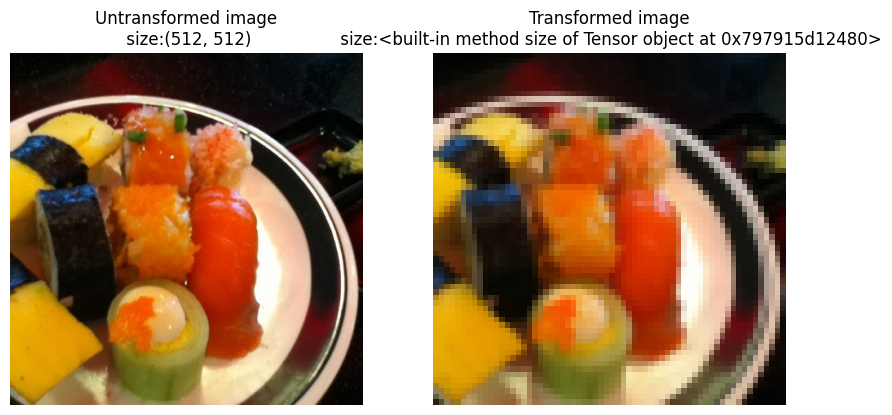

In [10]:
# Write a function to plot transformed images
def compare_img_to_transformed_img(image_paths, transform, random_seed):
  random.seed(random_seed)

  img_path = random.choice(image_paths)
  print(img_path)
  img = Image.open(img_path)

  transformed_img = transform(img)
  transformed_img = transformed_img.permute(1, 2, 0)

  plt.figure(figsize=(10, 7))

  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.axis(False);

  plt.title(f"Untransformed image\n size:{img.size}")

  plt.subplot(1, 2, 2)
  plt.imshow(transformed_img)
  plt.axis(False);

  plt.title(f"Transformed image\n size:{transformed_img.size}")

compare_img_to_transformed_img(image_list_paths, transform, 6)

### Load image data using `ImageFolder`

In [11]:
# Use ImageFolder to create dataset(s)
train_data = torchvision.datasets.ImageFolder(train_path, transform)
test_data = torchvision.datasets.ImageFolder(test_path, transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                  ToTensor()
                  Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  RandomHorizontalFlip(p=0.5)
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                  ToTensor()
                  Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  RandomHorizontalFlip(p=0.5)
            ))

In [12]:
# Get class names as a list
class_names = train_data.classes
print(class_names)

test_class_names = test_data.classes
print(test_class_names)



['pizza', 'steak', 'sushi']
['pizza', 'steak', 'sushi']


In [13]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [14]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [15]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle =True)

There are 32 images in a batch, and there are 8 batches


(-0.5, 63.5, 63.5, -0.5)

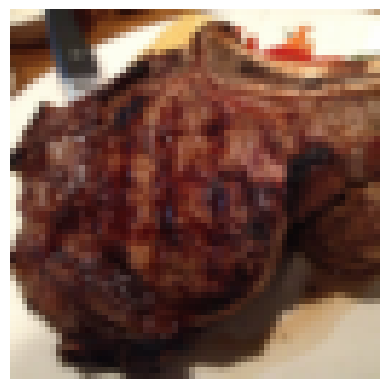

In [16]:
# How many batches of images are in our data loaders?
img, label = next(iter(train_dataloader))
print(f"There are {img.shape[0]} images in a batch, and there are {len(train_dataloader)} batches")
plt.imshow(img[0].permute(1,2,0))
plt.axis(False)

There are 32 images in a batch, and there are 3 batches


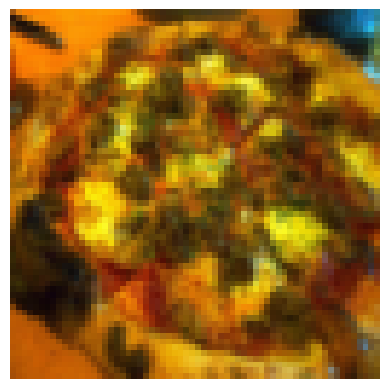

In [17]:
img, label = next(iter(test_dataloader))
print(f"There are {img.shape[0]} images in a batch, and there are {len(test_dataloader)} batches")
plt.imshow(img[0].permute(1,2,0));
plt.axis(False);

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [18]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int,
               kernel_size: int):
    super().__init__()
    self.first_conv2d_block = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = kernel_size,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = kernel_size,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.hidden_conv2d_block = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = kernel_size,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = kernel_size,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 16*16*hidden_units,
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.classifier(self.hidden_conv2d_block(self.first_conv2d_block(x)))

model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape = 3,
               kernel_size=3).to(device)

In [19]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

(-0.5, 63.5, 63.5, -0.5)

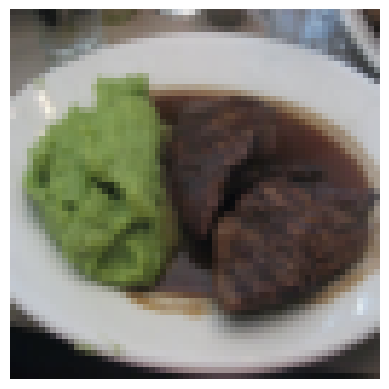

In [20]:
img, label = next(iter(train_dataloader))
plt.imshow(img[0].permute(1,2,0))
plt.axis(False)

In [21]:
print(len(train_dataloader))
print(len(next(iter(train_dataloader))))
image_batch, label_batch = next(iter(train_dataloader))

image_batch.shape, label_batch.shape

label_batch

8
2


tensor([1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        0, 2, 1, 2, 0, 0, 1, 1])

3
2


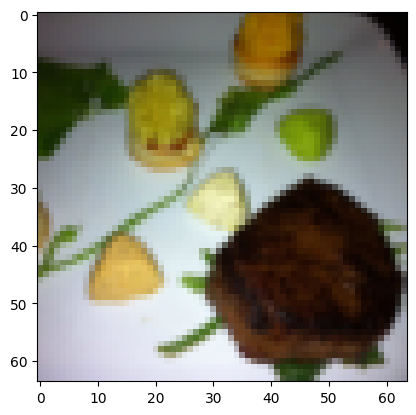

In [22]:
print(len(test_dataloader))
print(len(next(iter(test_dataloader))))
image_batch, label_batch = next(iter(test_dataloader))

image_batch.shape, label_batch.shape

plt.imshow(image_batch[16].permute(1,2,0))

## 4. Create training and testing functions for `model_0`.

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr=0.001)

In [24]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()
  model.to(device)

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for i, (batch, batch_labels) in enumerate(dataloader):

    # Send data to target device
    batch = batch.to(device)
    batch_labels = batch_labels.to(device)

    # 1. Forward pass
    y_logits = model(batch)
    y_probs = torch.softmax(y_logits, dim=1)
    y_preds = torch.argmax(y_probs, dim=1)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_logits, batch_labels)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumulate accuracy metric across all batches
    # print(f"batch labels {batch_labels}")
    # print(f"y_preds {y_preds}")
    accuracy = ((batch_labels == y_preds).sum()/len(batch_labels)).item()
    train_acc += accuracy

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)

  return train_loss, train_acc

model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape = 3,
               kernel_size=3).to(device)
train_step(model_0, train_dataloader, loss_fn, optimizer)

(1.1020994633436203, 0.28125)

In [25]:
# Daniel's function
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    # print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr=0.001)

In [27]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()
  model.to(device)

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():

    # Loop through DataLoader batches
    for i, (batch, batch_labels) in enumerate(dataloader):

      # Send data to target device
      batch = batch.to(device)
      batch_labels = batch_labels.to(device)

      # 1. Forward pass
      y_logits = model(batch)
      y_probs = torch.softmax(y_logits, dim=1)
      y_preds = torch.argmax(y_probs, dim=1)


      # 2. Calculate and accumulate loss
      loss = loss_fn(y_logits, batch_labels)
      test_loss += loss.item()


      # Calculate and accumulate accuracy
      # print(f"batch labels {batch_labels}")
      # print(f"y_preds {y_preds}")
      accuracy = ((batch_labels == y_preds).sum()/len(batch_labels)).item()
      test_acc += accuracy


  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)

  return test_loss, test_acc

test_step(model_0, test_dataloader, loss_fn)

(1.0935672521591187, 0.4621212085088094)

In [28]:
# Daniel's function
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)
      # print(test_pred_logits)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [29]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [30]:
# Train for 5 epochs
torch.manual_seed(43)
torch.cuda.manual_seed(43)

model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape = 3,
               kernel_size=3).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)

model_0_results = train(model_0, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1178 | train_acc: 0.2773 | test_loss: 1.1000 | test_acc: 0.2983
Epoch: 2 | train_loss: 1.1109 | train_acc: 0.2695 | test_loss: 1.0905 | test_acc: 0.4025
Epoch: 3 | train_loss: 1.1037 | train_acc: 0.2812 | test_loss: 1.0965 | test_acc: 0.4631
Epoch: 4 | train_loss: 1.0888 | train_acc: 0.4180 | test_loss: 1.1061 | test_acc: 0.2775
Epoch: 5 | train_loss: 1.1319 | train_acc: 0.2930 | test_loss: 1.1155 | test_acc: 0.2377


In [31]:
# Train for 20 epochs
torch.manual_seed(43)
torch.cuda.manual_seed(43)
model_1 = TinyVGG(input_shape=3, hidden_units=10, output_shape = 3,
               kernel_size=3).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr=0.001)

model_1_results = train(model_1, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1178 | train_acc: 0.2773 | test_loss: 1.1000 | test_acc: 0.2983
Epoch: 2 | train_loss: 1.1109 | train_acc: 0.2695 | test_loss: 1.0905 | test_acc: 0.4025
Epoch: 3 | train_loss: 1.1037 | train_acc: 0.2812 | test_loss: 1.0965 | test_acc: 0.4631
Epoch: 4 | train_loss: 1.0888 | train_acc: 0.4180 | test_loss: 1.1061 | test_acc: 0.2775
Epoch: 5 | train_loss: 1.1319 | train_acc: 0.2930 | test_loss: 1.1155 | test_acc: 0.2377
Epoch: 6 | train_loss: 1.0674 | train_acc: 0.4570 | test_loss: 1.0515 | test_acc: 0.4223
Epoch: 7 | train_loss: 1.0972 | train_acc: 0.2812 | test_loss: 1.0418 | test_acc: 0.4527
Epoch: 8 | train_loss: 1.0699 | train_acc: 0.3438 | test_loss: 1.0501 | test_acc: 0.3920
Epoch: 9 | train_loss: 1.0445 | train_acc: 0.5117 | test_loss: 1.0865 | test_acc: 0.3513
Epoch: 10 | train_loss: 1.0421 | train_acc: 0.3828 | test_loss: 1.0036 | test_acc: 0.5341
Epoch: 11 | train_loss: 1.0306 | train_acc: 0.3633 | test_loss: 1.0532 | test_acc: 0.4631
Epoch: 12 | train_l

In [32]:
# Train for 50 epochs
torch.manual_seed(43)
torch.cuda.manual_seed(43)

model_2 = TinyVGG(input_shape=3, hidden_units=10, output_shape = 3,
               kernel_size=3).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_2.parameters(),
                             lr=0.001)

model_2_results = train(model_2, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1178 | train_acc: 0.2773 | test_loss: 1.1000 | test_acc: 0.2983
Epoch: 2 | train_loss: 1.1109 | train_acc: 0.2695 | test_loss: 1.0905 | test_acc: 0.4025
Epoch: 3 | train_loss: 1.1037 | train_acc: 0.2812 | test_loss: 1.0965 | test_acc: 0.4631
Epoch: 4 | train_loss: 1.0888 | train_acc: 0.4180 | test_loss: 1.1061 | test_acc: 0.2775
Epoch: 5 | train_loss: 1.1319 | train_acc: 0.2930 | test_loss: 1.1155 | test_acc: 0.2377
Epoch: 6 | train_loss: 1.0674 | train_acc: 0.4570 | test_loss: 1.0515 | test_acc: 0.4223
Epoch: 7 | train_loss: 1.0972 | train_acc: 0.2812 | test_loss: 1.0418 | test_acc: 0.4527
Epoch: 8 | train_loss: 1.0699 | train_acc: 0.3438 | test_loss: 1.0501 | test_acc: 0.3920
Epoch: 9 | train_loss: 1.0445 | train_acc: 0.5117 | test_loss: 1.0865 | test_acc: 0.3513
Epoch: 10 | train_loss: 1.0421 | train_acc: 0.3828 | test_loss: 1.0036 | test_acc: 0.5341
Epoch: 11 | train_loss: 1.0306 | train_acc: 0.3633 | test_loss: 1.0532 | test_acc: 0.4631
Epoch: 12 | train_l

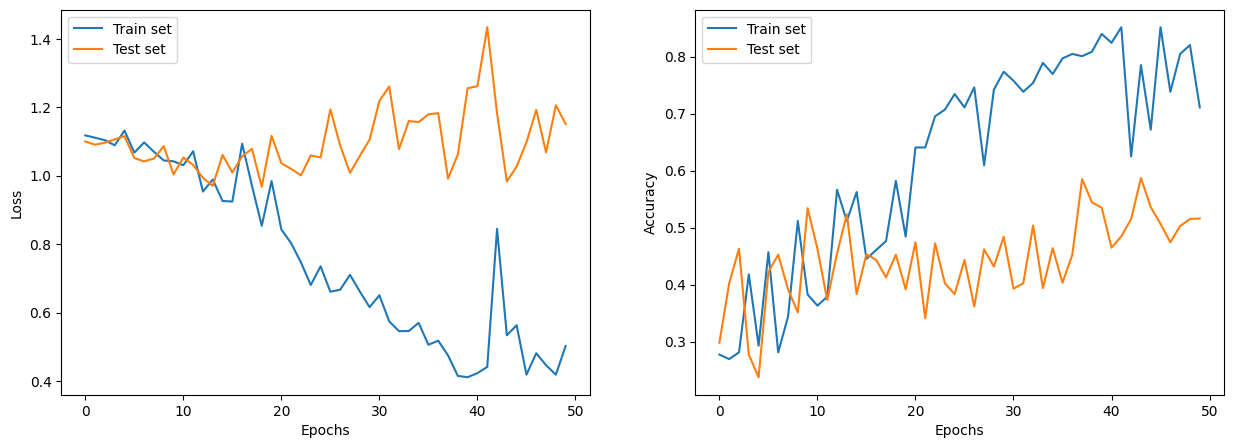

In [33]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax0.plot(model_2_results['train_loss'], label="Train set")
ax0.plot(model_2_results['test_loss'], label= "Test set")

ax1.plot(model_2_results['train_acc'], label="Train set")
ax1.plot(model_2_results['test_acc'], label="Test set")

ax0.set_xlabel("Epochs")
ax0.set_ylabel("Loss")
ax0.legend();

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend();


It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [34]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = TinyVGG(input_shape=3, hidden_units=20, output_shape = 3,
               kernel_size=3).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_3.parameters(),
                             lr=0.001)

model_3_results = train(model_3, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1060 | train_acc: 0.4180 | test_loss: 1.1067 | test_acc: 0.2803
Epoch: 2 | train_loss: 1.0695 | train_acc: 0.4258 | test_loss: 1.1178 | test_acc: 0.3002
Epoch: 3 | train_loss: 1.1394 | train_acc: 0.3047 | test_loss: 1.0958 | test_acc: 0.3400
Epoch: 4 | train_loss: 1.0962 | train_acc: 0.3320 | test_loss: 1.0956 | test_acc: 0.3087
Epoch: 5 | train_loss: 1.0845 | train_acc: 0.5547 | test_loss: 1.0897 | test_acc: 0.4328
Epoch: 6 | train_loss: 1.0579 | train_acc: 0.6055 | test_loss: 1.0852 | test_acc: 0.4328
Epoch: 7 | train_loss: 1.0334 | train_acc: 0.6211 | test_loss: 1.0634 | test_acc: 0.4119
Epoch: 8 | train_loss: 0.8930 | train_acc: 0.6523 | test_loss: 1.0490 | test_acc: 0.4015
Epoch: 9 | train_loss: 0.9269 | train_acc: 0.5430 | test_loss: 1.0579 | test_acc: 0.5445
Epoch: 10 | train_loss: 1.0255 | train_acc: 0.4961 | test_loss: 1.0436 | test_acc: 0.4754
Epoch: 11 | train_loss: 1.0793 | train_acc: 0.5312 | test_loss: 1.0070 | test_acc: 0.4962
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [35]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [36]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.


Excellent, we now have double the training and testing images...

In [37]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [59]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_dataset = ImageFolder(root=train_data_20_percent_path,
                            transform = transform)

test_dataset = ImageFolder(root=test_data_20_percent_path,
                           transform = transform)


# Create dataloaders

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [61]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_4 = TinyVGG(input_shape=3, hidden_units=20, output_shape=len(class_names),
                  kernel_size=3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_4.parameters(),
                             lr=0.001)
model_4_results = train(model_4, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1043 | train_acc: 0.3375 | test_loss: 1.0961 | test_acc: 0.3598
Epoch: 2 | train_loss: 1.0995 | train_acc: 0.3292 | test_loss: 1.0796 | test_acc: 0.3617
Epoch: 3 | train_loss: 1.0300 | train_acc: 0.4813 | test_loss: 1.0133 | test_acc: 0.4934
Epoch: 4 | train_loss: 0.9102 | train_acc: 0.6000 | test_loss: 1.1068 | test_acc: 0.4640
Epoch: 5 | train_loss: 0.8729 | train_acc: 0.5896 | test_loss: 0.9869 | test_acc: 0.4422
Epoch: 6 | train_loss: 0.9267 | train_acc: 0.5312 | test_loss: 1.0389 | test_acc: 0.4242
Epoch: 7 | train_loss: 0.8303 | train_acc: 0.6375 | test_loss: 1.0068 | test_acc: 0.4337
Epoch: 8 | train_loss: 0.8248 | train_acc: 0.6208 | test_loss: 1.0372 | test_acc: 0.4119
Epoch: 9 | train_loss: 0.7615 | train_acc: 0.6646 | test_loss: 1.0833 | test_acc: 0.4451
Epoch: 10 | train_loss: 0.7948 | train_acc: 0.6562 | test_loss: 1.0159 | test_acc: 0.4129
Epoch: 11 | train_loss: 0.7768 | train_acc: 0.6583 | test_loss: 1.0445 | test_acc: 0.4328
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [85]:
from PIL import Image
# Load the image
sushi_image = data_path / "vegan_sushi.png"
with open(data_path / "vegan_sushi.png", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/lnsayer/udemy_ml_course/main/Images/sushi.png")
  f.write(request.content)


sushi_img = Image.open(sushi_image, mode="r")


TypeError: conv2d() received an invalid combination of arguments - got (PngImageFile, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!PngImageFile!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!PngImageFile!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
